In [ ]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import re

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#reading data
data = pd.read_csv('/content/drive/MyDrive/IR-assignment-2-data.txt',sep=' ', header=None)

In [ ]:
#taking rows with qid=4 only
data = data[data[1] == "qid:4"] 

# PART 1 

Rearranging Query-URL pairs in order of max DCG

In [ ]:
#putting all rows in sorted order in opt_data
opt_data = data[[0,1]].copy()
opt_data = opt_data.sort_values([0],ascending=False)
opt_data = opt_data.reset_index(drop=True)

#putting first 50 rows in sorted order in opt_data
opt_data50 = data[[0,1]].head(50)
opt_data50 = opt_data50.sort_values([0],ascending=False)
opt_data50 = opt_data50.reset_index(drop=True)


Number of files that can be made 

In [ ]:
unique_values = []
num = 1
length = len(opt_data)

#putting all different relevance scores in a list :unique_values
for i in range(length):
  if opt_data.iloc[i][0] not in unique_values:
    unique_values.append(opt_data.iloc[i][0])

value_count = [0]*(len(unique_values))
print
#counting occurences of different relevance scores
for i in range(length):
  value_count[opt_data.iloc[i][0]] += 1

#calculating how much different arrangements we can make with relevance scores by keeping them in sorted order itself
for i in range(len(value_count)): 
  num = num*math.factorial(value_count[i])

print(num)

[59, 26, 17, 1]
19893497375938370599826047614905329896936840170566570588205180312704857992695193482412686565431050240000000000000000000000


# Part 2 : Compute NDCG

Computing IDCG

In [ ]:
#function to calculate ndcg 
# takes 2 parameters : 
  # 1. d = sorted data frame
  # 2. dl = number of rows in sorted data frame
  
def ndcg(d ,  dl):
  idcg = 0
  dcg = 0
  for i in range(dl):
    if i is 0 :
      idcg += d.iloc[i][0]
      dcg += data.iloc[i][0]
    else:
      idcg += d.iloc[i][0]/math.log(i+1,2)
      dcg += data.iloc[i][0]/math.log(i+1,2)
  return dcg/idcg 

At 50 

In [ ]:
print(ndcg(opt_data50, 50))

0.5253808413557646


For the whole dataset

In [ ]:
print(ndcg(opt_data,length))

0.5979226516897831


# Part 3 : Precision - Recall Curve


In [ ]:
new_data = pd.DataFrame()
temp = data[76].str.split(':', expand=True)
new_data[0] = data[0].copy()
new_data[1] = temp[1].copy()
new_data[[1]] = new_data[[1]].apply(pd.to_numeric)
new_data[0]= new_data[0].astype(int)
new_data = new_data.sort_values([1],ascending=False)
new_data = new_data.reset_index(drop=True)

In [ ]:
precision = []
recall = []
total_rel = 0
rel_count = 0

for i in range(len(new_data)):
   if new_data.iloc[i][0].astype(int) > 0:
     total_rel += 1

for i in range(len(new_data)):
    if new_data.iloc[i][0].astype(int) > 0:
        rel_count += 1
    precision.append(rel_count/(i+1))
    recall.append(rel_count/total_rel)

Text(0, 0.5, 'Precision')

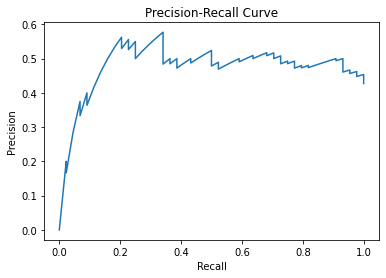

In [ ]:
plt.plot(recall, precision)
plt.title("Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
